# Aggregrating algorithm

### Imports

In [44]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Loading and preprocessing the data

In [15]:
def get_data(filename):
    data = np.genfromtxt(filename)
    data = np.delete(data, [0, 1, 2, 4, 6, 8, 10], axis = 1)
    return data

In [16]:
experts_predictions = get_data("tennis1.txt")
experts_predictions

array([[0.51469399, 0.52      , 0.49333333, 0.51786639],
       [0.795053  , 0.77067669, 0.78761062, 0.78570195],
       [0.6626506 , 0.67058823, 0.62025317, 0.66757804],
       ...,
       [0.76190476, 0.75      , 0.74020619, 0.77601411],
       [0.6203474 , 0.63414634, 0.63092269, 0.61357074],
       [0.79086116, 0.80431177, 0.77981651, 0.82089552]])

### Algorithm

In [65]:
def AA_Brier(experts_predictions, outcomes):
    T, N = experts_predictions.shape
    weights = np.tile(np.random.randn(1, 1)[0], (1, N))
    
    # Helper functions
    def generalised_prediction(p_t, gamma_t, substitute):
        exp = np.fromiter(map(math.exp, -2 * substitute(gamma_t)), dtype = np.float)
        return -0.5 * math.log(np.dot(p_t, exp))
    
    
    predict = lambda p_t, gamma_t: 0.5 - ((generalised_prediction(p_t, gamma_t, lambda gamma: (1 - gamma)**2) 
                                          - generalised_prediction(p_t, gamma_t, lambda gamma: gamma**2)) / 2)
    
    loss = lambda prediction: (1 - prediction)**2
    update_weights = lambda weights, loss: weights * np.fromiter(map(math.exp, -2 * loss), dtype = np.float)
    
    predictions = []
    experts_losses = []
    # Putting them together
    for experts_prediction in experts_predictions:
        print(weights)
        p_t = weights/sum(weights)
        experts_loss = np.fromiter(map(loss, experts_prediction), dtype = np.float)
        weights = update_weights(weights, experts_loss)
        
        p = predict(p_t, experts_prediction)   
        predictions.append(p)
        experts_losses.append(experts_loss)
        
        #if math.isnan(p):
            #print("Experts prediction", experts_prediction)
            #print("P_t", p_t)
            #print("Weights", weights)
        
    return predictions, np.array(experts_losses)

In [66]:
np.random.seed(0) # for reproducibility
predictions, experts_losses = AA_Brier(experts_predictions, 0)
print(predictions)
print(experts_losses)
#print(experts_losses - np.reshape([100, 200, 300, 400, 500], (5, 1)))

[[1.76405235 1.76405235 1.76405235 1.76405235]]
[[1.10138643 1.11272686 1.05568665 1.10816777]]
[[1.01264249 1.00163661 0.96461416 1.01091988]]
[[0.80650435 0.8062278  0.72293034 0.81046426]]
[[0.43318178 0.46945213 0.44432546 0.4612031 ]]
[[0.41790476 0.44050004 0.42486062 0.44304625]]
[[0.29802182 0.30056693 0.28471371 0.29830282]]
[[0.15324956 0.16318216 0.15206137 0.1584331 ]]
[[0.06107403 0.06638625 0.06186206 0.0592643 ]]
[[0.0461011  0.05169398 0.04787262 0.04737789]]
[[0.03000618 0.03464191 0.03132369 0.03051134]]
[[0.01953035 0.02241003 0.02026346 0.01891873]]
[[0.01271187 0.0155205  0.01310854 0.012992  ]]
[[0.00906756 0.01140667 0.00899066 0.00928028]]
[[0.00646638 0.00820742 0.00673805 0.0069829 ]]
[[0.00502657 0.00660623 0.00513117 0.00558576]]
[[0.00390736 0.00498665 0.0039075  0.00430354]]
[[0.00287228 0.0036649  0.00268001 0.00318416]]
[[0.0020071  0.00263044 0.00195406 0.00223181]]
[[0.00135667 0.00161671 0.001201   0.00138385]]
[[0.00112271 0.00134491 0.00099909 0.001

[[1.17258768e-185 3.12129677e-185 6.20262752e-185 1.77741300e-184]]
[[7.11210381e-186 1.81747568e-185 3.61167985e-185 1.00814861e-184]]
[[5.66433139e-186 1.38140366e-185 2.79493720e-185 8.00576643e-185]]
[[2.91272741e-186 7.45139503e-186 1.47340225e-185 4.38438295e-185]]
[[2.07768960e-186 5.43299574e-186 1.07429389e-185 3.17283734e-185]]
[[1.93869644e-186 5.01114191e-186 9.91426352e-186 2.92812481e-185]]
[[7.09105960e-187 1.84717400e-186 3.51112114e-186 1.09530938e-185]]
[[2.00920169e-187 4.94593569e-187 1.04050670e-186 3.04343958e-186]]
[[1.07916290e-187 2.76351233e-187 5.89087188e-187 1.68839257e-186]]
[[1.05625082e-187 2.68888198e-187 5.72550271e-187 1.67443834e-186]]
[[9.14229075e-188 2.23682583e-187 4.94850140e-187 1.38559365e-186]]
[[4.18564571e-188 9.59340535e-188 2.07358093e-187 5.99750487e-187]]
[[2.98492352e-188 6.85141552e-188 1.51189896e-187 4.43510144e-187]]
[[2.63418576e-188 5.77700816e-188 1.30672091e-187 3.78933069e-187]]
[[1.09457098e-188 2.56433275e-188 6.05375046e-18

C:\Users\Sameet\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide



[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0.

[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 

[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 

[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 

[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 

[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]
[[0. 0. 

[0.5114699151368919, 0.7846716594107587, 0.6550196036378744, 0.47462021198716237, 0.8486677411465741, 0.5648387766377464, 0.4370729090802328, 0.3199680333635644, 0.6445707504419838, 0.5399038880472423, 0.5286003804202999, 0.5519143115909697, 0.5879840887434988, 0.6064791432419043, 0.6529777140764901, 0.6349549606216613, 0.5981225341586883, 0.587582189231069, 0.5204370275302104, 0.6964312064442468, 0.6227060132436703, 0.4358017928776044, 0.8006031948220529, 0.31372026690296656, 0.5083346877693863, 0.5242368111194304, 0.8386168505832319, 0.47586867212755424, 0.3430107383343116, 0.42644066077070675, 0.5665972029142365, 0.8183839517386013, 0.6493733157725925, 0.8364481288310711, 0.8223357961585063, 0.7191794707729615, 0.41441589008063584, 0.46519270341050356, 0.34809675308075977, 0.7903126506916909, 0.3677346213338671, 0.30828202656057524, 0.578915797468978, 0.22633428902572394, 0.4643892059706094, 0.7454755337049092, 0.7130046556274647, 0.6554550244081446, 0.38923319827999625, 0.595298269

### Total loss of the AA

In [49]:
loss = lambda prediction: (1 - prediction)**2
aa_losses = np.fromiter(map(loss, predictions), dtype = np.float)
total_loss = sum(aa_loss)

### AA and Experts loss over time

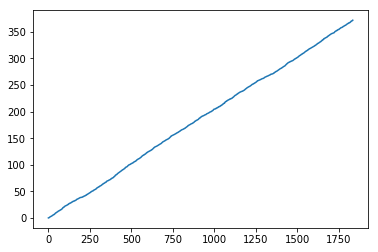

In [53]:
plt.plot(np.cumsum(aa_losses))
#plt.plot(np.cumsum(experts_losses[:, 1]))
plt.show()